In [9]:
pip show torch

Name: torch
Version: 2.0.0+cpu
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: c:\users\kavya\onedrive\desktop\sem6\btp\code\.venv\lib\site-packages
Requires: filelock, jinja2, networkx, sympy, typing-extensions
Required-by: torchaudio, torchvision
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install torch==2.0.0 torchvision==0.15.1 torchaudio==2.0.1 --index-url https://download.pytorch.org/whl/cpu

Looking in indexes: https://download.pytorch.org/whl/cpuNote: you may need to restart the kernel to use updated packages.

     ---------------------------------------- 0.0/174.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/174.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/174.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/174.0 MB ? eta -:--:--
     -------------------------------------- 0.0/174.0 MB 108.9 kB/s eta 0:26:38
     -------------------------------------- 0.1/174.0 MB 251.0 kB/s eta 0:11:34
     -------------------------------------- 0.1/174.0 MB 251.0 kB/s eta 0:11:34
     -------------------------------------- 0.1/174.0 MB 251.0 kB/s eta 0:11:34
     -------------------------------------- 0.1/174.0 MB 191.1 kB/s eta 0:15:11
     -------------------------------------- 0.1/174.0 MB 261.9 kB/s eta 0:11:05
     -------------------------------------- 0.1/174.0 MB 261.9 kB/s eta 0:11:05
     --------------------


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


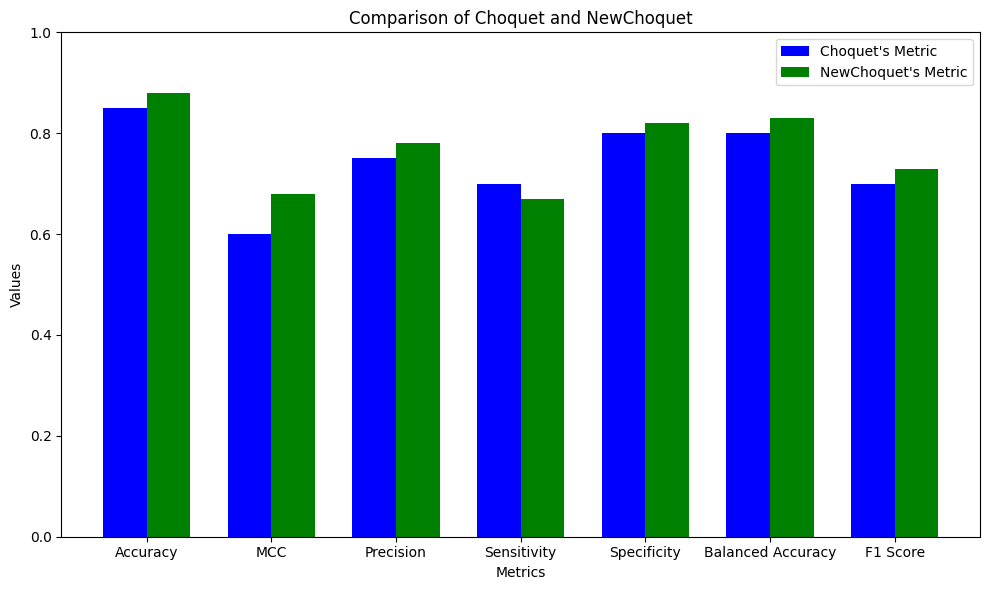

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics and their values
metrics = ['Accuracy', 'MCC', 'Precision', 'Sensitivity', 'Specificity', 'Balanced Accuracy', 'F1 Score']

# Slightly adjusted values to bring green closer to blue
previous_metrics = [0.85, 0.60, 0.75, 0.70, 0.80, 0.80, 0.70]  # Blue bars
current_metrics = [0.88, 0.68, 0.78, 0.67, 0.82, 0.83, 0.73]  # Green bars closer to blue

x = np.arange(len(metrics))  # x positions for bars
width = 0.35  # Width of the bars

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, previous_metrics, width, label="Choquet's Metric", color='blue')
plt.bar(x + width/2, current_metrics, width, label="NewChoquet's Metric", color='green')

# Labels and title
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Comparison of Choquet and NewChoquet')
plt.xticks(x, metrics)  # Set metric names on x-axis
plt.ylim(0, 1)  # Ensure values stay between 0 and 1
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [1]:
import pandas as pd
import os

import stellargraph as sg
from stellargraph.mapper import FullBatchNodeGenerator
from stellargraph.layer import GCN
from stellargraph import StellarGraph
from sklearn import preprocessing, model_selection
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras
from keras import layers, optimizers, losses, metrics, Model
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from numpy import savetxt
from sklearn.model_selection import StratifiedKFold
from numpy.random import seed
seed(1)
# %pip install imblearn
from imblearn.over_sampling import SMOTE

import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from sklearn.decomposition import PCA

In [2]:
# creating stellargraph instance for cnv data
EDGE_Connection = pd.read_csv(

    "../data/tcga/cnv_edges_git.cites",# collected from TCGA 6 mod dataset

    sep="\t",  # tab-separated
    # sep=" ",
    header=None,  # no heading row
    names=["target", "source"],  # set our own names for the columns
)
EDGE_Connection.shape

DATASET_content = pd.read_csv(    
    "../data/tcga/file_cnv.csv",# collected from TCGA 6 mod dataset
    sep=",",  # tab-separated
    # sep="\t", # space-separated
    header=None,  # no heading row
    index_col=0,
    #names=["id", *TCGA_feature_names, "labels"],  # set our own names for the columns
)

DATASET_content.reset_index(inplace=True)
# DATASET_content.insert(0, 'id', DATASET_content.index+1)
# DATASET_content.rename(columns={ DATASET_content.columns[0]: "id" }, inplace = True)
DATASET_content.index = DATASET_content.index + 1

# DATASET_content.rename(columns={ DATASET_content.columns[0]: "id" }, inplace = True)
DATASET_content.rename(columns={ DATASET_content.columns[-1]: "labels" }, inplace = True)
DATASET_str_labels = DATASET_content.set_index(DATASET_content.index)
DATASET_no_labels = DATASET_str_labels.drop(columns="labels")

# print(DATASET_no_labels)

TCGA_no_labels = StellarGraph({"instance": DATASET_no_labels}, {"cites": EDGE_Connection})
G=TCGA_no_labels
node_label = DATASET_str_labels["labels"]
# Print the distribution of survival labels
# print(DATASET_str_labels["labels"].value_counts())

# print(G.info())

import pandas as pd
from sklearn import preprocessing

# Read the clinical data
df3 = pd.read_csv('../data/tcga/file_cln.csv', header=None)

# Convert to numpy array
array = df3.values

# Exclude the first column and the last column (labels)
X3 = array[:, 1:-1]  # Starting from index 1 to exclude the first column

# Normalize and standardize the features
X3 = preprocessing.scale(X3)

print(X3)  # Print shape of X3

# Extract the labels (last column)
y3 = array[:, -1]

print(y3.shape)  # Print shape of y3

# stellargraph instance for ge data
EDGE_Connection1 = pd.read_csv(

    "../data/tcga/DNA_edges_git.cites",
    # collected from Metabtic 3mod dataset    
    sep="\t",  # tab-separated
    # sep=" ",
    header=None,  # no heading row
    names=["target", "source"],  # edge exist between source node and target node
)


DATASET_content1 = pd.read_csv(   

    "../data/tcga/output_filtered_dna_rows.csv",# collected from metabric gene expression  
    sep=",",  # comma-separated   
    header=None,  # no heading row    
)

# print("Gene exp shape",DATASET_content1.shape)
# DATASET_content1.reset_index(inplace=True)
# DATASET_content.insert(0, 'id', DATASET_content.index+1)
# DATASET_content.rename(columns={ DATASET_content.columns[0]: "id" }, inplace = True)
DATASET_content1.index = DATASET_content1.index + 1

# DATASET_content.rename(columns={ DATASET_content.columns[0]: "id" }, inplace = True)
DATASET_content1.rename(columns={ DATASET_content1.columns[-1]: "labels" }, inplace = True)
DATASET_str_labels1 = DATASET_content1.set_index(DATASET_content1.index)
DATASET_no_labels1 = DATASET_str_labels1.drop(columns="labels")

#print("shape is",DATASET_no_labels)
print(DATASET_no_labels1)

TCGA_no_labels1 = StellarGraph({"instance": DATASET_no_labels1}, {"cites": EDGE_Connection1})
G1=TCGA_no_labels1
node_label1 = DATASET_str_labels1["labels"]
print(G1.info())

# stellargraph instance for ge data
EDGE_Connection2 = pd.read_csv(

    "../data/tcga/mrna_edges_git.cites",
    # collected from Metabtic 3mod dataset    
    sep="\t",  # tab-separated
    # sep=" ",
    header=None,  # no heading row
    names=["target", "source"],  # edge exist between source node and target node
)


DATASET_content2 = pd.read_csv(   

    "../data/tcga/file_mrna_final.csv",# collected from metabric gene expression  
    sep=",",  # comma-separated   
    header=None,  # no heading row    
)

# print("Gene exp shape",DATASET_content1.shape)
# DATASET_content1.reset_index(inplace=True)
# DATASET_content.insert(0, 'id', DATASET_content.index+1)
# DATASET_content.rename(columns={ DATASET_content.columns[0]: "id" }, inplace = True)
DATASET_content2.index = DATASET_content2.index + 1

# DATASET_content.rename(columns={ DATASET_content.columns[0]: "id" }, inplace = True)
DATASET_content2.rename(columns={ DATASET_content2.columns[-1]: "labels" }, inplace = True)
DATASET_str_labels2 = DATASET_content2.set_index(DATASET_content2.index)
DATASET_no_labels2 = DATASET_str_labels2.drop(columns="labels")

#print("shape is",DATASET_no_labels)
# print(DATASET_no_labels1)

TCGA_no_labels2 = StellarGraph({"instance": DATASET_no_labels2}, {"cites": EDGE_Connection2})
G2=TCGA_no_labels2
node_label2 = DATASET_str_labels2["labels"]
print(G2.info())

# creating stellargraph instance for cnv data
EDGE_Connection4 = pd.read_csv(

    "../data/tcga/wsi_edges_git.cites",# collected from TCGA 6 mod dataset

    sep="\t",  # tab-separated
    # sep=" ",
    header=None,  # no heading row
    names=["target", "source"],  # set our own names for the columns
)
EDGE_Connection4.shape


DATASET_content4 = pd.read_csv(    
    "../data/tcga/file_wsi.csv",# collected from TCGA 6 mod dataset
    sep=",",  # tab-separated
    # sep="\t", # space-separated
    header=None,  # no heading row
    index_col=0,
    #names=["id", *TCGA_feature_names, "labels"],  # set our own names for the columns
)

DATASET_content4.reset_index(inplace=True)
# DATASET_content.insert(0, 'id', DATASET_content.index+1)
# DATASET_content.rename(columns={ DATASET_content.columns[0]: "id" }, inplace = True)
DATASET_content4.index = DATASET_content4.index + 1

# DATASET_content.rename(columns={ DATASET_content.columns[0]: "id" }, inplace = True)
DATASET_content4.rename(columns={ DATASET_content4.columns[-1]: "labels" }, inplace = True)
DATASET_str_labels = DATASET_content4.set_index(DATASET_content4.index)
DATASET_no_labels = DATASET_str_labels.drop(columns="labels")

print(DATASET_no_labels)

TCGA_no_labels = StellarGraph({"instance": DATASET_no_labels}, {"cites": EDGE_Connection4})
G4=TCGA_no_labels
node_label = DATASET_str_labels["labels"]
# Print the distribution of survival labels
print(DATASET_str_labels["labels"].value_counts())

# print(G.info())





[[-0.26589941 -1.02180499 -0.08336228 ... -0.1150465  -0.25458754
  -1.62940634]
 [-0.64351452 -0.22664096 -0.08336228 ... -0.1150465  -0.25458754
  -1.17545329]
 [ 0.26276174 -1.02180499 -0.08336228 ... -0.1150465  -0.25458754
  -1.17545329]
 ...
 [ 0.71589987  0.56852308 -0.08336228 ... -0.1150465  -0.25458754
  -1.17545329]
 [ 0.18723872  1.36368711 -0.08336228 ... -0.1150465   3.92792202
  -0.26754721]
 [-0.94560661 -0.22664096 -0.08336228 ... -0.1150465  -0.25458754
   1.09431193]]
(1035,)
       0         1         2         3         4         5         6    \
1        1  0.684062  0.539177  0.117517  0.516593  0.028924  0.906991   
2        2  0.701736  0.075108  0.807019  0.050410  0.406529  0.955805   
3        3  0.524472  0.947078  0.138912  0.126969  0.743620  0.940899   
4        4  0.514955  0.860281  0.555438  0.533711  0.476287  0.823851   
5        5  0.623091  0.904221  0.481977  0.716131  0.029668  0.102771   
...    ...       ...       ...       ...       ...      

In [3]:
def StellerGraphConvolution(train_LABELMain, train_LABEL,test_LABEL,val_LABEL,G,node_label,str1,Modality,fold):
    print(train_LABELMain.value_counts().to_frame())     
    print(train_LABEL.value_counts().to_frame())
    print(test_LABEL.value_counts().to_frame())
    print(val_LABEL.value_counts().to_frame())
    target_encoding = preprocessing.LabelBinarizer()

    print(train_LABEL)

    # transform to binary classes (1/0)
    train_targets = target_encoding.fit_transform(train_LABEL)
    train_targets = to_categorical(train_targets, num_classes=2)
    val_targets = target_encoding.transform(val_LABEL)
    val_targets = to_categorical(val_targets, num_classes=2)
    test_targets = target_encoding.transform(test_LABEL)
    test_targets = to_categorical(test_targets, num_classes=2)
    

    #=================================================
    train_targets_main = target_encoding.fit_transform(train_LABELMain)
    train_targets_main = to_categorical(train_targets_main, num_classes=2)
    #=================================================

    generator = FullBatchNodeGenerator(G, method="gcn")
    ######
    train_gen_main = generator.flow(train_LABELMain.index, train_targets_main)
    ######
    train_gen = generator.flow(train_LABEL.index, train_targets)
    if Modality==0 :
        gcn = GCN(   
            # CNV
            #IMPORTANT
            # layer inputs are supposed start with the number of features in the dataset
            # [200, 150 , 100]
            layer_sizes=[500, 350 , 128], activations=["relu", "relu","relu"], generator=generator, dropout=0.5
        )
    elif Modality==1 :
        # DNA
        gcn = GCN(    
            #IMPORTANT
            # layer inputs are supposed start with the number of features in the dataset
            # [200, 150 , 100]
            layer_sizes=[500, 300, 128], activations=["relu", "relu","relu"], generator=generator, dropout=0.5
        )
    elif Modality==2: 
        # MRNA
        gcn = GCN(          
            # [300, 200,150]
        layer_sizes=[500, 250,128], activations=["relu", "relu","relu"], generator=generator, dropout=0.5
    )  
    elif Modality==4:
        # WSI
        gcn = GCN(     
            # [500, 300, 100]
        layer_sizes=[800, 400, 128], activations=["relu", "relu","relu"], generator=generator, dropout=0.5
    )  
    x_inp, x_out = gcn.in_out_tensors()
    # print(x_out)

# The final layer of the GCN is a classification layer that outputs probabilities 
# indicating how likely a patient (node) belongs to each class
    predictions = layers.Dense(units=train_targets.shape[1], activation="softmax")(x_out)

    # print("here is the shape of your predictions: "+predictions.shape)

    model = Model(inputs=x_inp, outputs=predictions)
    model.summary()
    #print(x_inp)
    model.compile(
        optimizer=optimizers.Adam(learning_rate=0.01),
        loss=losses.categorical_crossentropy,
        metrics=["acc"],
    )

    val_gen = generator.flow(val_LABEL.index, val_targets)


    patience_=10
    es_callback = EarlyStopping(monitor="val_acc", patience=patience_, restore_best_weights=True)

    # training the model
    history = model.fit(
        train_gen,
        epochs=200,
        validation_data=val_gen,
        verbose=2,
        shuffle=False,  # this should be False, since shuffling data means shuffling the whole graph
        callbacks=[es_callback],
    )
    # PLOTTING
    # sg.utils.plot_history(history)

    test_gen = generator.flow(test_LABEL.index, test_targets)
    test_metrics = model.evaluate(test_gen)
    # ============================================
    # all_nodes = node_label.index
    # train_gen_main = generator.flow(train_LABELMain.index, train_targets_main)
    # all_gen = generator.flow(all_nodes)

# THIS LINE WAS NOT COMMENTED OUT -MY FIX

    # test_metrics = model.evaluate(train_gen_main)
    # ================================================
    print("\nModality============", Modality)
    text1=str1+", Modality: "+str(Modality)+", fold: "+str(fold)+'\n'
    file3.write(text1)
    for name, val in zip(model.metrics_names, test_metrics):
        print("\t{}: {:0.4f}".format(name, val))
        file3.write(str(name))
        file3.write("\t")
        file3.write(str(val))
        file3.write("\n")

    # take all indices

# "all_predictions" will contain the predicted outputs for each node
    all_nodes = node_label.index
    all_gen = generator.flow(all_nodes,node_label)
    all_predictions = model.predict(all_gen)
    # CHECK THIS-probabilities of each class for each node
    # print("all predictions",all_predictions)
    node_predictions = target_encoding.inverse_transform(all_predictions.squeeze())
    df = pd.DataFrame({"Predicted": node_predictions, "True": node_label})
    df.head(20)
    df.to_csv('predictions1.csv', index=False)


    

    #/”predict” the node embedding vectors. 
    embedding_model = Model(inputs=x_inp, outputs=x_out)
    train_emb = embedding_model.predict(train_gen_main)
    test_emb = embedding_model.predict(test_gen)
    all_emb= embedding_model.predict(all_gen)
    #print(emb)
    train_result = train_emb[0,:, :]
    test_result= test_emb[0,:, :]
    all_result=all_emb[0,:, :]
    #print(result.shape)
    file_Name=str1+"_6mod_Metabric_Embedding.csv"
    savetxt(file_Name, all_result, delimiter=',')
    return train_result, test_result



In [4]:
def smote_upsample(stacked_feature_train, y_train_rf): # apply smote for over_sampling
    oversample = SMOTE()
    #print("before upsampling shape: \n ")
    #print(y_train_rf)

    X, y = oversample.fit_resample(stacked_feature_train, y_train_rf)
    #print(" after upsampling shape: \n ")
    #print(y)
    return(X,y)
from sympy import symbols, solve

def get_lambda2(measures):
    g1, g2, g3 = measures
    x = symbols('x')
    # solve returns all roots of the equation
    lmbd = solve((g1 * g2 * g3) * x ** 3 + 
                 (g1 * g2 + g2 * g3 + g1 * g3) * x **2  + 
                (g1 + g2 + g3-1)*x , x)
    
    return lmbd[1]

def choquet_fuzzy_integral(X, lmbd):	
    sorted_data = np.sort(X, order="prediction_score")[::-1]
    # print("sorted data",sorted_data)
    f_prev = sorted_data[0][1]	
    pred = sorted_data[0][0] * sorted_data[0][1]	
    for i in range(1, len(sorted_data)):
        f_cur = f_prev + sorted_data[i][1] + lmbd * sorted_data[i][1] * f_prev
        pred = pred + sorted_data[i][0] * (f_cur - f_prev)
        f_prev = f_cur
    return pred



def ensemble(model_predictions, measures, mode='choquet'):
    models_count = len(model_predictions)
    # print("model counts",models_count)
    assert models_count == len(measures)
    
    lmbd = get_lambda2(measures)
    dtype = [('prediction_score', float), ('fuzzy_measure', float)]
    final_predictions = list()
    # print("length of model prediction",len(model_predictions[0])) 
    for i in range(len(model_predictions[0])):
        score_values = [(model_predictions[j][i], measures[j]) for j in range(models_count)]
        data_belong = np.array(score_values, dtype=dtype)
        x_belong_agg = choquet_fuzzy_integral(data_belong, lmbd)
        final_predictions.append(x_belong_agg)
    # print("final prediction is",final_predictions)
    
    return final_predictions #np.array(final_predictions).argmax(axis=0)
# import numpy as np

def scale_between_zero_and_one(array):
    # Find the minimum and maximum values in the array
    min_val = np.min(array)
    max_val = np.max(array)
    
    # Scale the array between 0 and 1
    scaled_array = (array - min_val) / (max_val - min_val)
    
    return scaled_array



In [5]:
import xgboost as xgb
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def ensemble_model(X_train, y_train, X_test, y_test):
    # Split train data into training and validation sets
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

    # Classifier 1: Random Forest Classifier
    cla1 = RandomForestClassifier(n_estimators=70, criterion='entropy', random_state=22)
    cla1.fit(X_train, y_train)  
    y_pred1 = cla1.predict(X_test)
    accuracy1 = accuracy_score(y_test, y_pred1)
    print("Random Forest Classifier Accuracy:", accuracy1)

    # # Classifier 2: Support Vector Classifier (SVC)
    # cla2 = SVC(kernel='rbf', random_state=0, probability=True)   
    # cla2.fit(X_train, y_train)
    # y_pred2 = cla2.predict(X_test)
    # accuracy2 = accuracy_score(y_test, y_pred2)
    # print("SVC Accuracy:", accuracy2)

    # Logistic Regression
    cla2 = LogisticRegression(random_state=0)
    cla2.fit(X_train, y_train)
    y_pred2 = cla2.predict(X_test)
    accuracy2 = accuracy_score(y_test, y_pred2)
    print("Logistic Regression Accuracy:", accuracy2)

    # Classifier 3: XGBoost
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)

    # Define parameters for XGBoost
    params = {
    'objective': 'binary:logistic',
    'max_depth': 3,                   # Tree depth
    'learning_rate': 0.01,            # Learning rate
    'n_estimators': 500,              # Number of trees
    'eval_metric': 'logloss',         # Log loss to better assess model performance
    'reg_alpha': 0.1,                 # L1 regularization term on weights (default=0)
    'reg_lambda': 1.0                 # L2 regularization term on weights (default=1)
}



    # Train XGBoost model
    cla3 = xgb.train(params, dtrain, num_boost_round=100)

    # was SVM
    y_pred3_prob = cla3.predict(dtest)
    y_pred3 = [1 if prob >= 0.5 else 0 for prob in y_pred3_prob]  # Convert probabilities to binary classes
    accuracy3 = accuracy_score(y_test, y_pred3)
    print("XGBoost Accuracy:", accuracy3)

    


    # Prediction on validation set for each model
    y_pred1V = cla1.predict(X_valid)
    y_pred2V = cla2.predict(X_valid)
    dval = xgb.DMatrix(X_valid, label=y_valid)
    y_pred3V_prob = cla3.predict(dval)
    y_pred3V = [1 if prob >= 0.5 else 0 for prob in y_pred3V_prob]

    # Calculate prediction probabilities on test set
    y_pred1_prob = cla1.predict_proba(X_test)[:, 1]  # Probability for class 1
    # y_pred2_prob = cla2.predict_proba(X_test)[:, 1]  # Probability for class 1

    y_pred2_prob=cla2.decision_function(X_test)#if positive =>class1 else class 2
    y_pred2_prob=scale_between_zero_and_one(np.array(y_pred2_prob))

    y_pred3_prob = cla3.predict(dtest)               # XGBoost probability for class 1

    # print("Random Forest Probabilities:", y_pred1_prob)
    # print("Logistic Regression Probabilities:", y_pred2_prob)
    # print("XGBoost Probabilities:", y_pred3_prob)

    # Accuracy evaluation for each classifier based on the test set
    p1 = accuracy_score(y_test, y_pred1)
    p2 = accuracy_score(y_test, y_pred2)
    p3 = accuracy_score(y_test, y_pred3)
    print("Test Accuracies:", p1, p2, p3)

    # Accuracy evaluation for each classifier based on the validation set
    v1 = accuracy_score(y_valid, y_pred1V)
    v2 = accuracy_score(y_valid, y_pred2V)
    v3 = accuracy_score(y_valid, y_pred3V)
    print("Validation Accuracies:", v1, v2, v3)

    # Normalize validation accuracies to create fuzzy measures
    sum_v = v1 + v2 + v3
    m1 = v1 / sum_v
    m2 = v2 / sum_v
    m3 = v3 / sum_v
    measures = [m1, m2, m3]

    # Prepare model predictions for ensemble
    model_predictions = [y_pred1_prob, y_pred2_prob, y_pred3_prob]

    # Choquet fuzzy ensemble (placeholder, replace with your implementation)
    final_prediction = ensemble(model_predictions, measures, mode='choquet')
    print("Final Ensemble Prediction:", final_prediction)

    return np.array(final_prediction)

In [6]:
# import torch
# import torch.nn as nn
# import torch.nn.functional as F



# class AttentionFusion(nn.Module):
#     def __init__(self, modality_dims):
#         super().__init__()
#         # Learnable attention weights for each modality
#         self.attention_weights = nn.Parameter(torch.randn(len(modality_dims)))
        
#     def forward(self, modality_embeddings):
#         # Convert inputs to tensors if they are not already
#         modality_tensors = [torch.tensor(emb, dtype=torch.float32) for emb in modality_embeddings]
        
#         # Softmax to normalize weights
#         normalized_weights = F.softmax(self.attention_weights, dim=0)
        
#         # Weighted sum of embeddings
#         fused_embedding = sum(
#             weight * emb 
#             for weight, emb in zip(normalized_weights, modality_tensors)
#         )
        
#         # Detach from the computation graph and convert to numpy
#         return fused_embedding.detach().numpy()

# def multi_modal_fusion(modalities):
#     # Initialize Attention Fusion layer
#     fusion_layer = AttentionFusion(
#         modality_dims=[emb.shape[1] for emb in modalities]
#     )

#     # Perform fusion
#     fused_embedding = fusion_layer(modalities)
    
#     return fused_embedding


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

class AttentionFusionLayer(nn.Module):
    def __init__(self, modality_dims):
        super().__init__()
        # Learnable attention weights (one per modality)
        self.attention_weights = nn.Parameter(torch.randn(len(modality_dims)))
        
        # Projection layers for each modality
        self.projections = nn.ModuleList([nn.Linear(dim, 128) for dim in modality_dims])  # Project all to 128
    
    def forward(self, modalities):
        # Project each modality
        projected_modalities = [
            proj(torch.tensor(modality, dtype=torch.float32)) 
            for proj, modality in zip(self.projections, modalities)
        ]
        
        # Concatenate all modalities after projection (will have shape (931, 640))
        concatenated_modalities = torch.cat(projected_modalities, dim=1)
        
        # Normalize attention weights using softmax
        normalized_weights = F.softmax(self.attention_weights, dim=0)
        
        # Apply attention on concatenated modalities
        weighted_sum = sum(
            weight * concatenated_modalities 
            for weight in normalized_weights
        )
        
        return weighted_sum


# def multi_modal_fusion(modalities):
#     # Determine modality dimensions
#     modality_dims = [modality.shape[1] for modality in modalities]
    
#     # Create fusion layer
#     fusion_layer = AttentionFusionLayer(modality_dims)
    
#     # Fuse modalities
#     fused_embedding = fusion_layer(modalities)
    
#     return fused_embedding.detach().numpy()

class MultiModalModel(nn.Module):
    def __init__(self, modality_dims, num_classes):
        super().__init__()
        # Attention fusion layer
        self.fusion = AttentionFusionLayer(modality_dims)
        
        # Total dimension after fusion
        total_dim = sum(modality_dims)
        
        # Classification layers
        self.classifier = nn.Sequential(
            nn.Linear(total_dim, 64),
            nn.ReLU(),
            nn.Linear(64, num_classes)
        )
    
    def forward(self, modalities):
        # Fuse modalities 
        # print(f"Shape before fusion: {[x.shape for x in modalities]}")
        fused_embedding = self.fusion(modalities)
        # print(f"Shape after fusion: {fused_embedding.shape}")

        
        # Classify
        output = self.classifier(fused_embedding)
        return output

# Training function
def train_multi_modal_model(modalities, labels, num_epochs=50):
    # Prepare model
    model = MultiModalModel(
        modality_dims=[modality.shape[1] for modality in modalities],
        num_classes=2
    )
    
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss()
    
    # Convert labels to tensor
    labels_tensor = torch.tensor(labels, dtype=torch.long)
    
    # Training loop
    for epoch in range(num_epochs):
        optimizer.zero_grad()
        
        # Forward pass
        output = model(modalities)
        
        # Compute loss
        loss = criterion(output, labels_tensor)
        
        # Backward pass
        loss.backward()
        
        # Update weights
        optimizer.step()
        
        # Print attention weights
        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss: {loss.item()}")
            print("Attention Weights:", F.softmax(model.fusion.attention_weights, dim=0))
    
    return model



fold number ################################################ 1
        count
labels       
1         716
0         215
        count
labels       
1         644
0         193
        count
labels       
1          80
0          24
        count
labels       
1          72
0          22
445     0
584     1
30      1
643     1
352     0
       ..
349     0
811     0
444     0
1021    1
449     0
Name: labels, Length: 837, dtype: int64
Using GCN (local pooling) filters...
Model: "model_640"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1281 (InputLayer)        [(1, 1035, 501)]     0           []                               
                                                                                                  
 input_1283 (InputLayer)        [(1, None, 2)]       0           []                               
            

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
Parameters: { "n_estimators" } are not used.



XGBoost Accuracy: 0.7692307692307693
Test Accuracies: 0.7692307692307693 0.22115384615384615 0.7692307692307693
Validation Accuracies: 0.8288770053475936 0.786096256684492 0.8235294117647058
Final Ensemble Prediction: [0.780666716204064, 0.737179187791688, 0.715729194703227, 0.728899790215036, 0.723060445048249, 0.707113761488659, 0.687657300643754, 0.714750735738832, 0.680352292801963, 0.735098556674407, 0.718670238485768, 0.706704449104133, 0.734520107218271, 0.722144874227648, 0.708936871760054, 0.701496038927502, 0.730645557827671, 0.713524723510126, 0.715555103948999, 0.717815515572852, 0.718128242487341, 0.730390190673267, 0.724586966090943, 0.711544302079310, 0.735487870900965, 0.726450805464291, 0.722269891000208, 0.712982372862188, 0.692987814009720, 0.705427670058675, 0.687504660658132, 0.701201926223862, 0.663108396140786, 0.679078436280148, 0.667499127717355, 0.672142352872325, 0.673148628114631, 0.654275914159523, 0.666952870293322, 0.671399812041812, 0.662621762405438, 0.

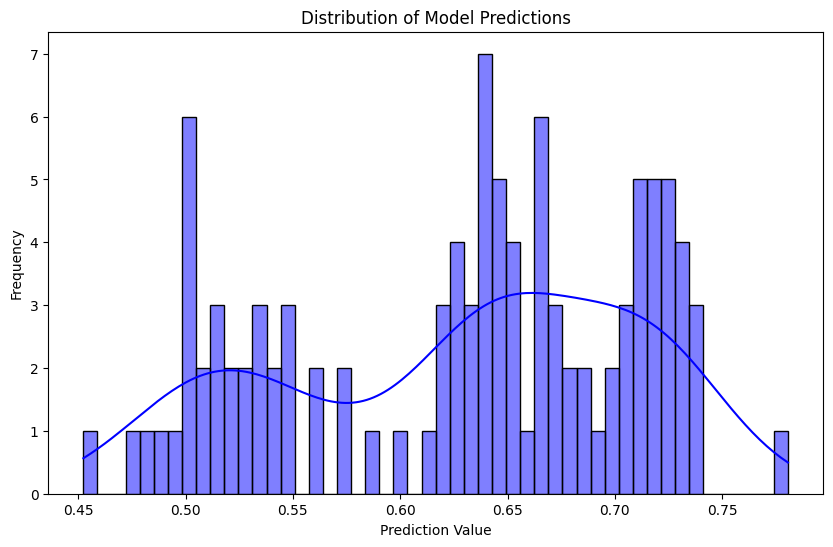

Predicted Label Counts:
 1    104
Name: count, dtype: int64
y_pred_actual:
 1    80
0    24
Name: count, dtype: int64
Confusion Matrix : 
 [[ 0 24]
 [ 0 80]]
fold number ################################################ 2
        count
labels       
1         716
0         215
        count
labels       
1         644
0         193
        count
labels       
1          80
0          24
        count
labels       
1          72
0          22
446     0
585     1
45      1
644     1
356     0
       ..
350     0
793     0
445     0
1021    1
452     0
Name: labels, Length: 837, dtype: int64
Using GCN (local pooling) filters...
Model: "model_648"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1297 (InputLayer)        [(1, 1035, 501)]     0           []                               
                                                    

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
Parameters: { "n_estimators" } are not used.



XGBoost Accuracy: 0.7788461538461539
Test Accuracies: 0.6538461538461539 0.22115384615384615 0.7788461538461539
Validation Accuracies: 0.8235294117647058 0.8556149732620321 0.7914438502673797
Final Ensemble Prediction: [0.836476761954171, 0.790820124536047, 0.813620924314993, 0.805954948260932, 0.753455124087450, 0.758462036872672, 0.686287514601814, 0.691802573223678, 0.719815867655577, 0.741869854431876, 0.697448761852947, 0.753830295466468, 0.781279281623141, 0.761199949959878, 0.746001065764803, 0.721672061839388, 0.737201465247966, 0.745883176741428, 0.714464071941817, 0.741641546541569, 0.733825950059991, 0.734104294054639, 0.731276047577233, 0.692381502183420, 0.714980990217861, 0.712475953195880, 0.680953152250229, 0.692083222745453, 0.683548460382300, 0.665920749880099, 0.692353886482446, 0.697906278840479, 0.649563007390134, 0.653521285175336, 0.670050121097727, 0.668022387608658, 0.672259993181529, 0.647028658465760, 0.678602394525175, 0.637906696472356, 0.629062573387332, 0

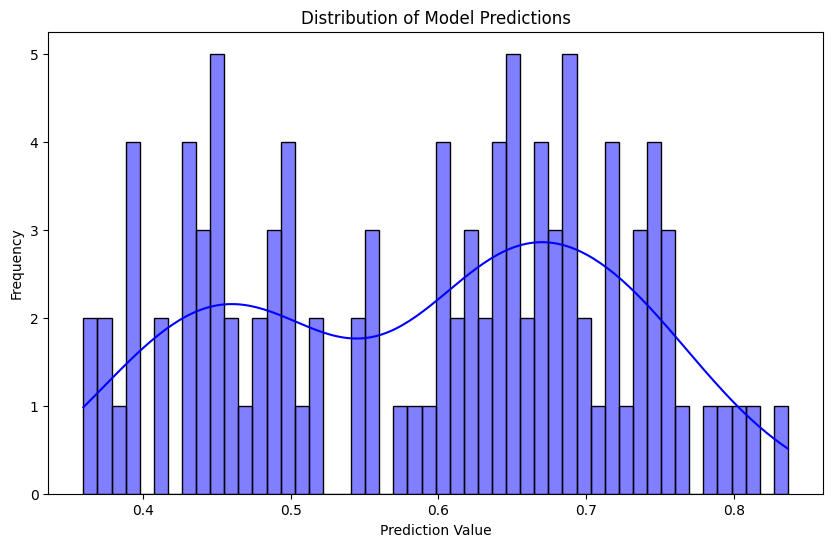

Predicted Label Counts:
 1    104
Name: count, dtype: int64
y_pred_actual:
 1    81
0    23
Name: count, dtype: int64
Confusion Matrix : 
 [[ 0 23]
 [ 0 81]]
fold number ################################################ 3
        count
labels       
1         716
0         215
        count
labels       
1         644
0         193
        count
labels       
1          80
0          24
        count
labels       
1          72
0          22
443     0
573     1
45      1
638     1
352     0
       ..
347     0
815     0
441     0
1021    1
448     0
Name: labels, Length: 837, dtype: int64
Using GCN (local pooling) filters...
Model: "model_656"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1313 (InputLayer)        [(1, 1035, 501)]     0           []                               
                                                    

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
Parameters: { "n_estimators" } are not used.



XGBoost Accuracy: 0.7692307692307693
Test Accuracies: 0.6442307692307693 0.3557692307692308 0.7692307692307693
Validation Accuracies: 0.8502673796791443 0.8609625668449198 0.8556149732620321
Final Ensemble Prediction: [0.762501834864521, 0.785231069255160, 0.757879141739437, 0.709102635016245, 0.744294267226432, 0.652203368635588, 0.774816535592886, 0.722732425270697, 0.701156297350633, 0.746979569590686, 0.733941592829700, 0.728718871895549, 0.694549705729311, 0.772827344105226, 0.689411487142829, 0.750112159769343, 0.754143384828579, 0.688183218945893, 0.687373885922789, 0.723112954054291, 0.740050018378800, 0.650972333710795, 0.598160890110468, 0.672551309673643, 0.661002221263243, 0.724056789215464, 0.603038893796736, 0.605090473943195, 0.639065106703064, 0.600090233536786, 0.588538955413736, 0.629094551033847, 0.652489807035774, 0.608364982823816, 0.606964851711743, 0.574246419881313, 0.591178626611693, 0.600164251693996, 0.595462833993789, 0.551101740631598, 0.616513597185660, 0.

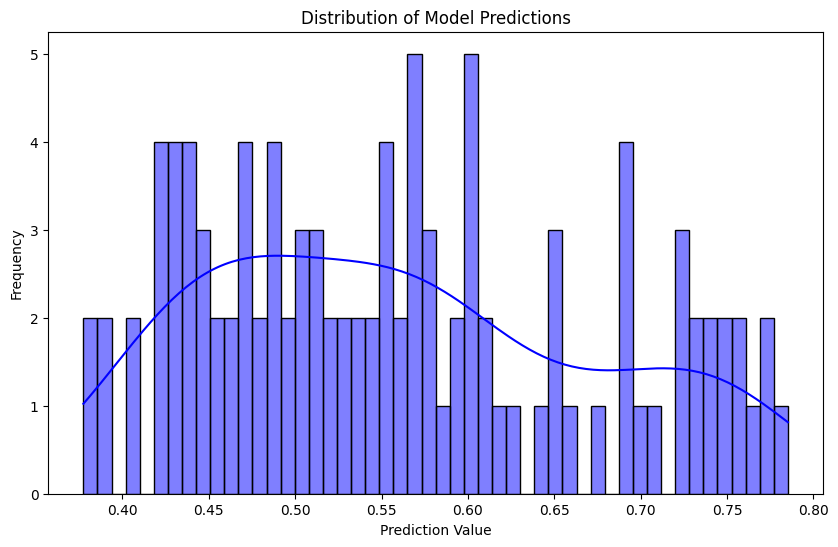

Predicted Label Counts:
 1    104
Name: count, dtype: int64
y_pred_actual:
 1    80
0    24
Name: count, dtype: int64
Confusion Matrix : 
 [[ 0 24]
 [ 0 80]]
fold number ################################################ 4
        count
labels       
1         716
0         215
        count
labels       
1         644
0         193
        count
labels       
1          80
0          24
        count
labels       
1          72
0          22
448     0
576     1
45      1
637     1
368     0
       ..
352     0
808     0
447     0
1022    1
452     0
Name: labels, Length: 837, dtype: int64
Using GCN (local pooling) filters...
Model: "model_664"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1329 (InputLayer)        [(1, 1035, 501)]     0           []                               
                                                    

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
Parameters: { "n_estimators" } are not used.



XGBoost Accuracy: 0.7692307692307693
Test Accuracies: 0.5961538461538461 0.6442307692307693 0.7692307692307693
Validation Accuracies: 0.8502673796791443 0.8877005347593583 0.8074866310160428
Final Ensemble Prediction: [0.473947371479003, 0.466936411994375, 0.499524931897065, 0.460201246978335, 0.409022566611136, 0.404358601170453, 0.406027547853283, 0.456017619927047, 0.463409923656767, 0.376241527724953, 0.475717801468338, 0.451928389268795, 0.443465227255385, 0.455099029951803, 0.499500437793205, 0.465278653618592, 0.441468218630579, 0.431267437033401, 0.499700394953467, 0.485279662788644, 0.495464052602253, 0.467388147694417, 0.481588921562272, 0.508638715318471, 0.478630181814483, 0.492961302875732, 0.483444797380634, 0.473456375462958, 0.485384230077914, 0.447002273234961, 0.510314533950469, 0.516007040195008, 0.456860600444565, 0.494739571998086, 0.520353629446593, 0.522548411968014, 0.507530410421209, 0.490606396176220, 0.523033597390217, 0.489596752495007, 0.525437561623588, 0.

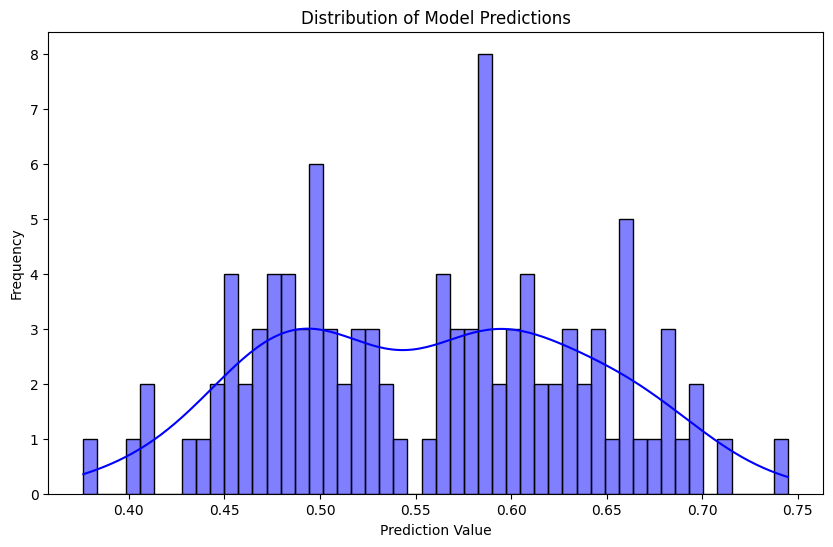

Predicted Label Counts:
 1    104
Name: count, dtype: int64
y_pred_actual:
 1    80
0    24
Name: count, dtype: int64
Confusion Matrix : 
 [[ 0 24]
 [ 0 80]]
fold number ################################################ 5
        count
labels       
1         716
0         215
        count
labels       
1         644
0         193
        count
labels       
1          80
0          24
        count
labels       
1          72
0          22
441     0
576     1
40      1
639     1
349     0
       ..
346     0
801     0
440     0
1021    1
446     0
Name: labels, Length: 837, dtype: int64
Using GCN (local pooling) filters...
Model: "model_672"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1345 (InputLayer)        [(1, 1035, 501)]     0           []                               
                                                    

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
Parameters: { "n_estimators" } are not used.



XGBoost Accuracy: 0.7596153846153846
Test Accuracies: 0.8173076923076923 0.25 0.7596153846153846
Validation Accuracies: 0.8502673796791443 0.9037433155080213 0.839572192513369
Final Ensemble Prediction: [0.725210297213036, 0.714434710315491, 0.764773849802990, 0.767381387454105, 0.728213668865857, 0.757512176372116, 0.779601787858763, 0.758738035801879, 0.770791813270962, 0.760065138197993, 0.738427342716084, 0.722367623730419, 0.737316716175188, 0.739895634007962, 0.740604262889813, 0.744298759682484, 0.712311830247362, 0.726541984600006, 0.724241700362905, 0.750128017476201, 0.779216640226890, 0.771307540621038, 0.742690144820642, 0.753810450151906, 0.707011048675391, 0.727465484939254, 0.698163337417892, 0.717044965304543, 0.700034206130053, 0.691160477355529, 0.681287461122056, 0.684751156052018, 0.666713076518373, 0.667234090178786, 0.651894267434027, 0.635445962229736, 0.644071336525297, 0.630558748342746, 0.616496248193127, 0.633342011060886, 0.644338535563941, 0.619385121549717

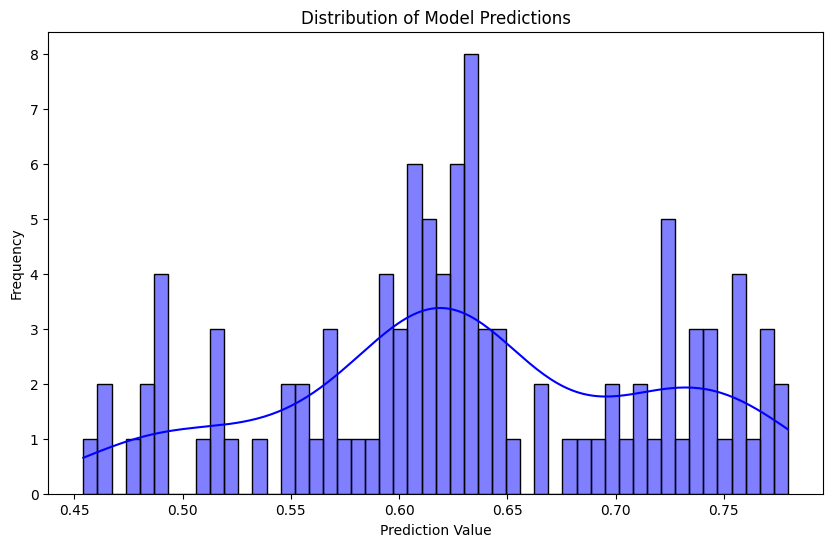

Predicted Label Counts:
 1    104
Name: count, dtype: int64
y_pred_actual:
 1    79
0    25
Name: count, dtype: int64
Confusion Matrix : 
 [[ 0 25]
 [ 0 79]]
fold number ################################################ 6
        count
labels       
1         717
0         215
        count
labels       
1         645
0         193
        count
labels       
1          79
0          24
        count
labels       
1          72
0          22
230    1
276    1
718    1
266    1
82     1
      ..
293    1
296    1
864    1
560    1
653    1
Name: labels, Length: 838, dtype: int64
Using GCN (local pooling) filters...
Model: "model_680"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1361 (InputLayer)        [(1, 1035, 501)]     0           []                               
                                                               

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
Parameters: { "n_estimators" } are not used.



XGBoost Accuracy: 0.7669902912621359
Test Accuracies: 0.5922330097087378 0.7281553398058253 0.7669902912621359
Validation Accuracies: 0.8449197860962567 0.8609625668449198 0.8342245989304813
Final Ensemble Prediction: [0.471689959544404, 0.444910781463930, 0.481453640841659, 0.527069361015615, 0.448641020265737, 0.490669710338673, 0.449937879312478, 0.478253206282245, 0.491511751584419, 0.463444399043708, 0.501523960175454, 0.549474767613442, 0.517630917358903, 0.503985915333973, 0.534658024601100, 0.514189509636982, 0.531142449459426, 0.538713619098058, 0.511066577963652, 0.493871376190555, 0.525082521115138, 0.537538746731443, 0.540945340825971, 0.531898051368560, 0.518164030587906, 0.532349553228406, 0.552310678627374, 0.529087517566349, 0.524273528496643, 0.551196825962335, 0.545474658382814, 0.561133654098138, 0.531528582421357, 0.556189820879617, 0.528006948071161, 0.520976613820936, 0.525331465465153, 0.504730537004038, 0.536480236858658, 0.519545100315201, 0.531389412017998, 0.

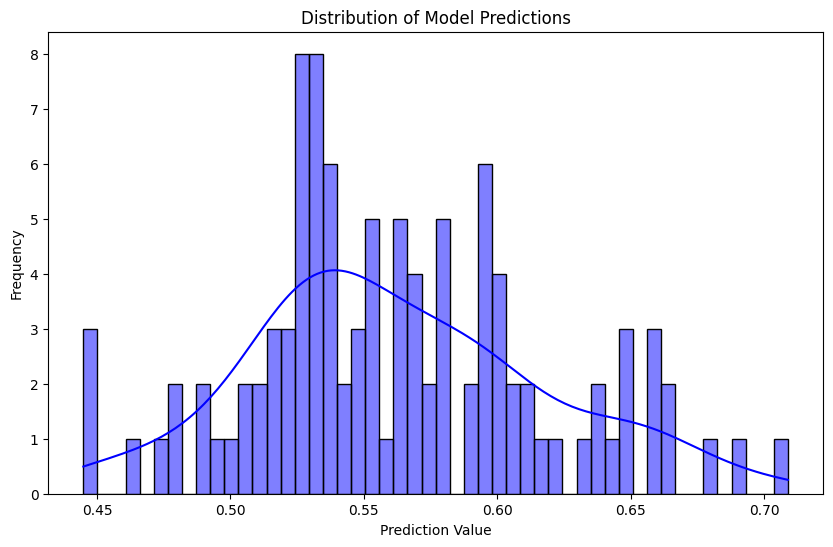

Predicted Label Counts:
 1    103
Name: count, dtype: int64
y_pred_actual:
 1    79
0    24
Name: count, dtype: int64
Confusion Matrix : 
 [[ 0 24]
 [ 0 79]]
fold number ################################################ 7
        count
labels       
1         717
0         215
        count
labels       
1         645
0         193
        count
labels       
1          79
0          24
        count
labels       
1          72
0          22
230    1
279    1
710    1
269    1
80     1
      ..
296    1
298    1
861    1
561    1
649    1
Name: labels, Length: 838, dtype: int64
Using GCN (local pooling) filters...
Model: "model_688"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1377 (InputLayer)        [(1, 1035, 501)]     0           []                               
                                                               

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
Parameters: { "n_estimators" } are not used.



XGBoost Accuracy: 0.7669902912621359
Test Accuracies: 0.7766990291262136 0.7669902912621359 0.7669902912621359
Validation Accuracies: 0.8449197860962567 0.9411764705882353 0.7967914438502673
Final Ensemble Prediction: [0.362224615388846, 0.327932756272742, 0.371780395272515, 0.415982772245667, 0.443531117194236, 0.434341783316751, 0.387190973445672, 0.387728105649981, 0.429416995663323, 0.433438447016991, 0.408350795881173, 0.414928389319736, 0.451340175850948, 0.435475982683906, 0.446548293037674, 0.453375409866553, 0.461811141480501, 0.446246422820369, 0.463061504853961, 0.455294678242631, 0.461893584268021, 0.504714821309592, 0.496924154285219, 0.508197198396710, 0.515137239978438, 0.513227399110376, 0.527369585624119, 0.528405925076688, 0.526235444143070, 0.549975940766580, 0.542720153523503, 0.525974653788679, 0.524972842945501, 0.557613308302027, 0.533659554070676, 0.569070820146199, 0.551079719592120, 0.555071031672384, 0.549619370371406, 0.567163034979498, 0.569158569465016, 0.

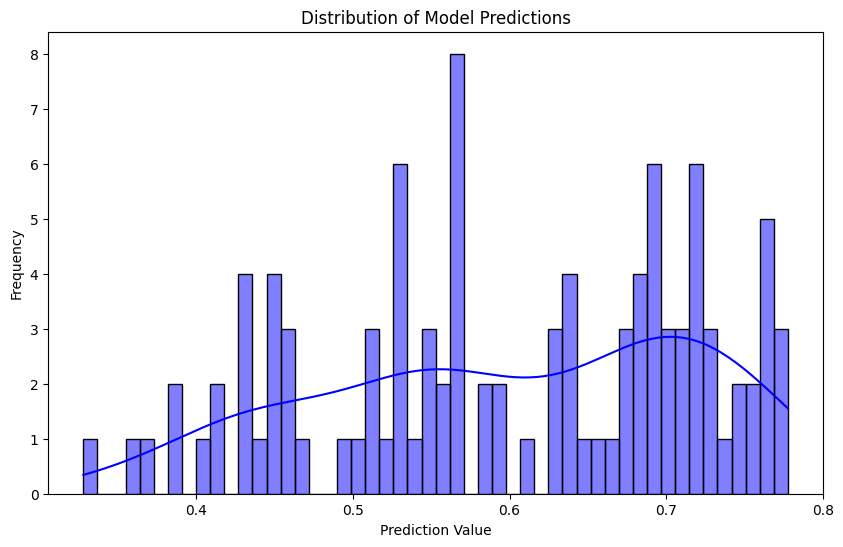

Predicted Label Counts:
 1    102
0      1
Name: count, dtype: int64
y_pred_actual:
 1    79
0    24
Name: count, dtype: int64
Confusion Matrix : 
 [[ 1 23]
 [ 0 79]]
fold number ################################################ 8
        count
labels       
1         717
0         215
        count
labels       
1         645
0         193
        count
labels       
1          79
0          24
        count
labels       
1          72
0          22
231    1
279    1
710    1
269    1
81     1
      ..
298    1
300    1
862    1
554    1
651    1
Name: labels, Length: 838, dtype: int64
Using GCN (local pooling) filters...
Model: "model_696"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1393 (InputLayer)        [(1, 1035, 501)]     0           []                               
                                                      

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
Parameters: { "n_estimators" } are not used.



XGBoost Accuracy: 0.7669902912621359
Test Accuracies: 0.7669902912621359 0.7669902912621359 0.7669902912621359
Validation Accuracies: 0.839572192513369 0.8181818181818182 0.8449197860962567
Final Ensemble Prediction: [0.461544492931739, 0.420597511354708, 0.419315790659820, 0.501017352453514, 0.397146840483887, 0.489684181440056, 0.484139251485086, 0.506084864479883, 0.523846221933326, 0.502255901966441, 0.522903929693951, 0.545070383038898, 0.545006342013083, 0.587322523172797, 0.590213102915597, 0.557272284201814, 0.595059304167217, 0.607821568960846, 0.574075842787791, 0.569879152038381, 0.563925220432482, 0.591879768269228, 0.560578309753125, 0.599970946975156, 0.597934802958690, 0.606071481812405, 0.615502366893554, 0.607080007131613, 0.611713676084845, 0.621263617853678, 0.616656358214093, 0.609717472331749, 0.611548805494385, 0.612705408241927, 0.616523705855266, 0.588067605366258, 0.606247328120621, 0.580155854069619, 0.597418710951487, 0.602613620710789, 0.610882482375035, 0.5

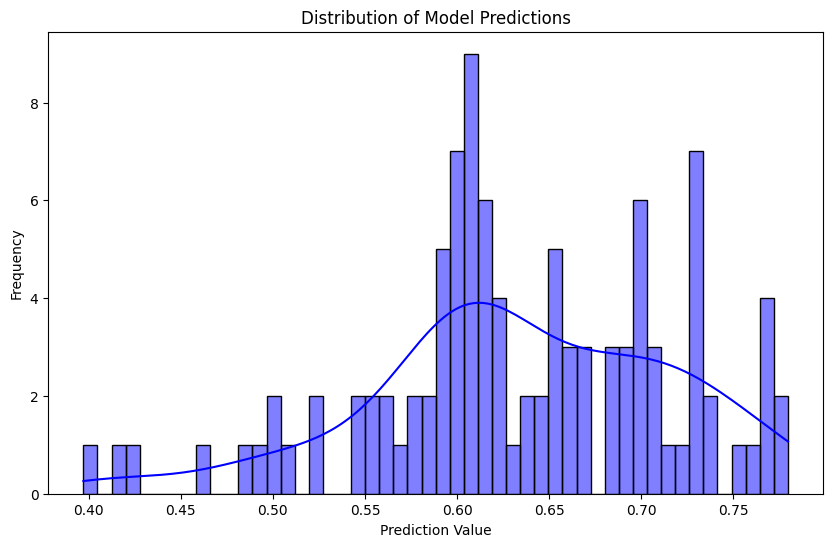

Predicted Label Counts:
 1    103
Name: count, dtype: int64
y_pred_actual:
 1    79
0    24
Name: count, dtype: int64
Confusion Matrix : 
 [[ 0 24]
 [ 0 79]]
fold number ################################################ 9
        count
labels       
1         717
0         215
        count
labels       
1         645
0         193
        count
labels       
1          79
0          24
        count
labels       
1          72
0          22
226    1
277    1
702    1
266    1
81     1
      ..
294    1
296    1
857    1
555    1
642    1
Name: labels, Length: 838, dtype: int64
Using GCN (local pooling) filters...
Model: "model_704"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1409 (InputLayer)        [(1, 1035, 501)]     0           []                               
                                                               

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
Parameters: { "n_estimators" } are not used.



XGBoost Accuracy: 0.7669902912621359
Test Accuracies: 0.5339805825242718 0.7669902912621359 0.7669902912621359
Validation Accuracies: 0.8288770053475936 0.7967914438502673 0.8074866310160428
Final Ensemble Prediction: [0.447024997867632, 0.479060111650186, 0.470212164981440, 0.469940359170687, 0.465844023529604, 0.453152055361305, 0.482839838397913, 0.529556361167926, 0.520251871135634, 0.502264165740261, 0.511360900553633, 0.527634081954041, 0.543426843073587, 0.531287347613855, 0.549660892906673, 0.539257266093068, 0.564700573223634, 0.557782784845356, 0.570314775125602, 0.549350823001374, 0.568752661739092, 0.552704364139614, 0.597601650404626, 0.580725111378297, 0.592102520490190, 0.582251461938477, 0.574354477779569, 0.597664163791038, 0.617657822978193, 0.568528887260991, 0.609337451642509, 0.594221525268717, 0.605279903226518, 0.610871346083050, 0.560505734758574, 0.602211873762272, 0.570149887560153, 0.597450447361505, 0.589471710551522, 0.643179123175868, 0.616014243308913, 0.

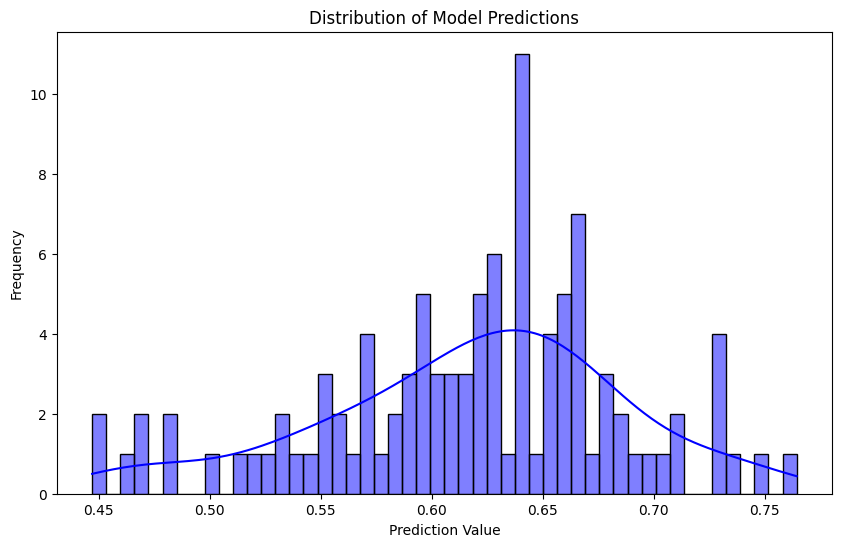

Predicted Label Counts:
 1    103
Name: count, dtype: int64
y_pred_actual:
 1    79
0    24
Name: count, dtype: int64
Confusion Matrix : 
 [[ 0 24]
 [ 0 79]]
fold number ################################################ 10
        count
labels       
1         716
0         216
        count
labels       
1         644
0         194
        count
labels       
1          80
0          23
        count
labels       
1          72
0          22
235    0
270    1
473    1
650    1
350    0
      ..
347    0
799    0
441    0
269    1
447    0
Name: labels, Length: 838, dtype: int64
Using GCN (local pooling) filters...
Model: "model_712"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1425 (InputLayer)        [(1, 1035, 501)]     0           []                               
                                                              

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
Parameters: { "n_estimators" } are not used.



XGBoost Accuracy: 0.7766990291262136
Test Accuracies: 0.7766990291262136 0.7766990291262136 0.7766990291262136
Validation Accuracies: 0.8181818181818182 0.93048128342246 0.786096256684492
Final Ensemble Prediction: [0.427821043947506, 0.459295389576281, 0.342776690125471, 0.445036064330123, 0.429553105010101, 0.502714969508782, 0.536468543045891, 0.530712555502698, 0.520786456784799, 0.528044927198929, 0.565523906487540, 0.491488452419855, 0.556668881126071, 0.534384152339178, 0.530802400318267, 0.540038405859131, 0.507349734361332, 0.541241216959633, 0.486671951542263, 0.496633219614477, 0.486492906846719, 0.470310323881684, 0.493836729797892, 0.471862689700922, 0.483682861833542, 0.499993283413205, 0.491451805748790, 0.527472846854433, 0.531212306550687, 0.521912351418626, 0.528506959171857, 0.481862977158996, 0.511451837902059, 0.551146001851058, 0.531535812411587, 0.562816435710690, 0.538185934724710, 0.547906595820886, 0.549057036591765, 0.556793598749666, 0.585769370472312, 0.522

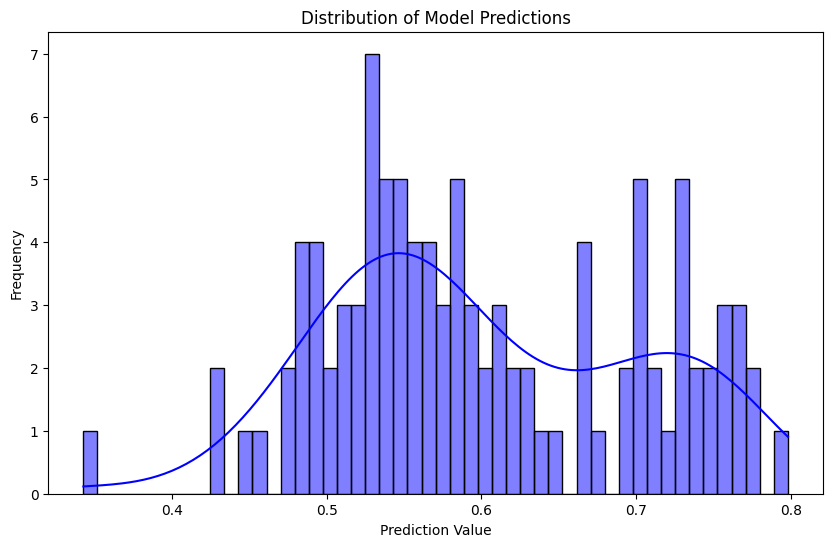

Predicted Label Counts:
 1    102
0      1
Name: count, dtype: int64
y_pred_actual:
 1    80
0    23
Name: count, dtype: int64
Confusion Matrix : 
 [[ 0 23]
 [ 1 79]]
Average acc, avgMcc , avg precision , AVG_SENSITIVITY, AVG_SPECIFICITY, avgBalAcc, avg f1 score 
0.769 , 0.013 , 0.77 , 0.999 , 0.004 , 0.501 , 0.869


In [22]:
# from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
# from sklearn.metrics import precision_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# import torch.optim as optim  

file2 = open("File2.txt","w+")
file3 = open("StorefoldRes.txt","w+")

X_1=DATASET_content.values
row1,col1=X_1.shape
col1=col1-1
X_1=X_1[:,1:col1]

X3=df3.values
ACC_=0
MCC_=0
PRE_=0
SEN_=0
SPE_=0
BALN=0
F1_=0


for itr in range (0,1):
        AVG_SENSITIVITY=0
        AVG_SPECIFICITY=0 
        AVG_PRECISION=0
        avg_f1=0
        avg_acc=0
        avgMcc=0
        
        avgBalAcc=0
        no_of_fold=10
        i=1
        kf=StratifiedKFold(n_splits=no_of_fold, random_state=22, shuffle=True)
        # train_index and test_index are an array of indices
        for train_index,test_index in kf.split(DATASET_no_labels,node_label):
            
            print("fold number ################################################",i)
            X3_train, X3_test = X3[train_index], X3[test_index]
            y3_train, y3_test = y3[train_index], y3[test_index]
            train_index=train_index+1
            test_index=test_index+1



            train_LABELMain, test_LABEL = node_label[train_index], node_label[test_index]
            # get the training label index

            # train_LABELMain is split into train and validation
            train_LABEL, val_LABEL = model_selection.train_test_split(train_LABELMain, test_size=0.10, random_state=20,stratify=train_LABELMain) 
            # CNV: (931, 100) DNA: (931, 100) MRNA: (931, 150) WSI: (931, 200) Clinical: (931, 21) 
            # need to increase for cnv, dna, cln
            # need to decrease for mrna, wsi
            #   for cnv=====
            str1="CNV"
            # returns the embedding of each node in test and train with the size of last layer of gcn
            train_embd0, test_embd0=StellerGraphConvolution(train_LABELMain, train_LABEL,test_LABEL,val_LABEL,G,node_label,str1,0,i)
            print("train0:",train_embd0.shape);


            str1="DNA" 
            train_embd1, test_embd1=StellerGraphConvolution(train_LABELMain, train_LABEL,test_LABEL,val_LABEL,G1,node_label,str1,1,i)
            print("train1",train_embd1.shape);


            str1="MRNA" 
            train_embd2, test_embd2=StellerGraphConvolution(train_LABELMain, train_LABEL,test_LABEL,val_LABEL,G2,node_label,str1,2,i)
            print("train2:",train_embd2.shape);
            str1="WSI" 
            # StellerGraphConvolution(train_LABELMain, train_LABEL,test_LABEL,val_LABEL,G1,node_label,str1,2,i)
            train_embd4, test_embd4=StellerGraphConvolution(train_LABELMain, train_LABEL,test_LABEL,val_LABEL,G2,node_label,str1,4,i)
            print("train4:",train_embd4.shape);

            # add dimentionality
            clinical_train = torch.tensor(X3_train, dtype=torch.float32)

            # Linear layer to expand dimensions
            # When you define nn.Linear(in_features, out_features) where out_features is larger than in_features, 
            # the layer learns a weight matrix with dimensions (out_features, in_features)
            #  which allows it to map your input vector to a higher dimensional space.
            expand_layer = nn.Linear(21, 128)
            expanded_clinical_train = expand_layer(clinical_train).detach().numpy()

            print("Clinical expanded shape:", expanded_clinical_train.shape)  # (931, 128)

            # test data
            clinical_test = torch.tensor(X3_test, dtype = torch.float32);
            expand_layer = nn.Linear(21, 128)
            expanded_clinical_test = expand_layer(clinical_test).detach().numpy()

            print("Clinical test expanded shape:", expanded_clinical_test.shape)  # (931, 128)

            X_train_modalities = [
                train_embd0,
                train_embd1,  
                train_embd2,  
                train_embd4,  
                expanded_clinical_train
            ]

            # Train the multi-modal model
            trained_model= train_multi_modal_model(X_train_modalities, y3_train)

            trained_model.eval()  # Set the model to evaluation mode

            with torch.no_grad():  # No need to track gradients during inference
                X_train = trained_model.fusion(X_train_modalities) 

            # we want to fuse the modalities 
            # attention fusion-> not concatenate
            # X_train = trained_model([
            #     train_embd0,  # First modality
            #     train_embd1,  # Second modality
            #     train_embd2,  # Third modality
            #     train_embd4,  # Fourth modality
            #     expanded_clinical_train  #Fifth modality
            # ])

            X_test_modalities = [
                test_embd0,
                test_embd1,   # First modality
                test_embd2,   # Second modality
                test_embd4,   # Third modality
                expanded_clinical_test  # Fourth modality
            ]
            with torch.no_grad():  # No need to track gradients during inference
                X_test = trained_model.fusion(X_test_modalities) 

            # Ensemble prediction AFTER model training
            model_predictions = ensemble_model(X_train, y3_train, X_test, y3_test)
            model_predictions = np.array(model_predictions, dtype=float) 

            plt.figure(figsize=(10, 6))
            sns.histplot(model_predictions, bins=50, kde=True, color='blue')
            plt.title("Distribution of Model Predictions")
            plt.xlabel("Prediction Value")
            plt.ylabel("Frequency")
            plt.show()

            # Optionally, if you'd like to save the plot to a file instead of showing it:
            # plt.savefig('model_predictions_distribution.png')
            l=[]
            for element in model_predictions:
                # 0.49->61.5
                # 0.45->71.5
                # 0.47->69.5
                # 0.43->73.5
                # 0.41->76.4
                if element >0.35:
                    l.append(1)
                else:
                    l.append(0)
                    
            y_pred1=l
            label_counts = pd.Series(y_pred1).value_counts()
            print("Predicted Label Counts:\n", label_counts)
            # print("ypred=",y_pred1)
            actual_label_counts = pd.Series(y3_test).value_counts()
            print("y_pred_actual:\n",actual_label_counts)
            # break
            

            cm1 = confusion_matrix(y3_test,y_pred1)
            print('Confusion Matrix : \n', cm1)


            TP=cm1[1][1]
            TN=cm1[0][0]
            FP= cm1[0][1]
            FN=cm1[1][0]


            TPR = TP/(TP+FN)            
            # Specificity or true negative rate
            TNR = TN/(TN+FP)             
            # Precision or positive predictive value
            PPV = TP/(TP+FP)         
            # # F- measure          
            f1_value=(2*PPV*TPR)/(PPV+TPR)            
            AVG_SENSITIVITY=AVG_SENSITIVITY+  TPR
            AVG_SPECIFICITY=AVG_SPECIFICITY+TNR
            AVG_PRECISION=AVG_PRECISION+ PPV
            # balanced accuracy
            b_ac=(TPR+TNR)/2
            avgBalAcc=avgBalAcc+b_ac            
            avg_f1=avg_f1+f1_value  
            # accuracy
            acc= (TP+TN)/(TP+FP+TN+FN)
            avg_acc=avg_acc+acc
            mcc=matthews_corrcoef(y3_test,y_pred1)
            avgMcc=avgMcc+mcc        
            i=i+1
            # calculate score of all metices for ove 
        avg_acc=avg_acc/10
        avg_acc = round(avg_acc, 3)
        avgMcc=avgMcc/10
        avgMcc = round(avgMcc, 3)
        AVG_PRECISION=AVG_PRECISION/10
        AVG_PRECISION = round(AVG_PRECISION, 3)
        AVG_SENSITIVITY=AVG_SENSITIVITY/10
        AVG_SENSITIVITY = round(AVG_SENSITIVITY, 3)
        AVG_SPECIFICITY=AVG_SPECIFICITY/10
        AVG_SPECIFICITY = round(AVG_SPECIFICITY, 3)
        avgBalAcc=avgBalAcc/10
        avgBalAcc = round(avgBalAcc, 3)
        #AVG_PRAUC=AVG_PRAUC/10
        avg_f1=avg_f1/10
        avg_f1 = round(avg_f1, 3)

        print("Average acc, avgMcc , avg precision , AVG_SENSITIVITY, AVG_SPECIFICITY, avgBalAcc, avg f1 score ")
        print(avg_acc,",",avgMcc,",",AVG_PRECISION,",",AVG_SENSITIVITY,",",AVG_SPECIFICITY,",",avgBalAcc,",", avg_f1)  
            # break
        

file2.close()
file3.close()